In [1]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import json
import numpy as np
import plotly.io as pio
pio.renderers.default = 'plotly_mimetype+notebook'
import os
from urllib import request
import geodata as geo
%config Completer.use_jedi = False
from zipfile import ZipFile
import app_functions as app

## Download Sectors

In [ ]:
list_ufs = ['PE', 'GO', 'AC','AL','AM','AP','BA','CE','DF','ES','MA','MG','MS','MT','PA','PB','PI','PR','RJ','RN','RO','RR','RS','SC','SE','SP','TO']
#list_ufs = ['GO', 'AC']

In [ ]:
geo.donwload_sectors_shp_2010(ufs=list_ufs)

In [ ]:
geo.download_sector_statistics_2010(ufs=list_ufs)

In [ ]:
#for uf in ['TO', 'PE', 'GO', 'AC']:
for uf in ['AL','AM','AP','BA','CE','DF']:
    #,,'ES','MA','MG','MS','MT','PA','PB','PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
for uf in ['ES','MA','MS','MT','PA','PB']:
#    ,'PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
for uf in ['MG']:
#    ,'PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
for uf in ['PI','PR','RN','RO','RR','SC','SE']:
#    ,'PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
for uf in ['RJ']:
#    ,'PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
for uf in ['RS']:
#    ,'PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
for uf in ['SP']:
#    ,'PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
def treat_sectors_shp(uf):
    
    dict_ufs = {
        'RO':'11',
        'AC':'12',
        'AM':'13',
        'RR':'14',
        'PA':'15',
        'AP':'16',
        'TO':'17',
        'MA':'21',
        'PI':'22',
        'CE':'23',
        'RN':'24',
        'PB':'25',
        'PE':'26',
        'AL':'27',
        'SE':'28',
        'BA':'29',
        'MG':'31',
        'ES':'32',
        'RJ':'33',
        'SP':'35',
        'PR':'41',
        'SC':'42',
        'RS':'43',
        'MS':'50',
        'MT':'51',
        'GO':'52',
        'DF':'53'
    }
    
    gdf = gpd.read_file(f'data/territorio/setores2010/{uf}/{dict_ufs[uf]}SEE250GC_SIR.shp')

    gdf = gdf.to_crs("EPSG:5880")

    gdf.rename(columns={'CD_GEOCODI':'Cod'}, inplace=True)

    gdf.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

    if uf.upper() == 'PE':
        df_pb_pop = pd.read_csv(f'data/pop/setores/PE/PE_20171016/PE/Base informaçoes setores2010 universo {uf.upper()}/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
    elif uf.upper() == 'ES':
        df_pb_pop = pd.read_csv(f'data/pop/setores/ES/Base informaçoes setores2010 universo {uf.upper()}/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
    elif uf.upper() == 'TO':
        df_pb_pop = pd.read_csv(f'data/pop/setores/TO/Base informacoes setores2010 universo TO/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
    elif uf.upper() == 'RS':
        df_pb_pop = pd.read_csv(f'data/pop/setores/RS/RS_20150527/RS/Base informaçoes setores2010 universo {uf.upper()}/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
    elif uf.upper() == 'SP':        
        df_pb_pop = pd.read_csv(f'data/pop/setores/SP/Base informaçoes setores2010 universo SP_Capital/CSV/Basico_SP1.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
        df_pb_po2 = pd.read_csv(f'data/pop/setores/SP/SP Exceto a Capital/Base informaçoes setores2010 universo SP_Exceto_Capital/CSV/Basico_SP2.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='utf-8')
        df_pb_pop = pd.concat(objs=[df_pb_pop, df_pb_po2])
    else:
        df_pb_pop = pd.read_csv(f'data/pop/setores/{uf.upper()}/{uf.upper()}/Base informaçoes setores2010 universo {uf.upper()}/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')

    df_pb_pop.columns = ['Cod', 'Pop']

    df_pb_pop['Cod'] = df_pb_pop.Cod.astype(np.int64)

    df_pb_pop['Pop'].fillna(value=0, inplace=True)

    df_pb_pop['Pop'] = df_pb_pop['Pop'].astype(np.int64)

    gdf['Cod'] = gdf.Cod.astype(np.int64)

    gdf = gdf.merge(df_pb_pop, on='Cod', how='left')

    gdf['Pop'].fillna(value=0, inplace=True)

    gdf['Pop'] = gdf['Pop'].astype(np.int64)

    gdf['Area'] = gdf.area / 10000

    gdf['Pop/ha'] = gdf['Pop'] / gdf['Area']

    gdf1 = gpd.read_file(f'data/territorio/setores2010/{uf}/{dict_ufs[uf]}SEE250GC_SIR.shp')

    gdf1.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

    gdf1.rename(columns={'CD_GEOCODI':'Cod'}, inplace=True)

    gdf1['Cod'] = gdf1['Cod'].astype(np.int64)

    gdf1 = gdf1.merge(right=gdf[['Cod', 'Pop', 'Area', 'Pop/ha']], on='Cod', how='left')            
    
    return gdf1

In [ ]:
def load_sector_geodataframe(uf,cod_municipio):
    cod_municipio = str(cod_municipio)
    gdf = gpd.read_file(f'data/territorio/setores2010/{uf}/{cod_municipio}/{cod_municipio}.shp')
    return gdf

## Verificação da função geo.treat_sectors_shp para o caso de São Paulo

In [ ]:
lon = gdf1.dissolve(by='NM_MUNICIP').centroid.x[0]
lat = gdf1.dissolve(by='NM_MUNICIP').centroid.y[0]

In [12]:
gdf1 = gdf[gdf['NM_MUNICIP']=='ADAMANTINA']

In [113]:
gdf1 = gdf1[gdf1['NM_MUNICIP']=='ADAMANTINA']

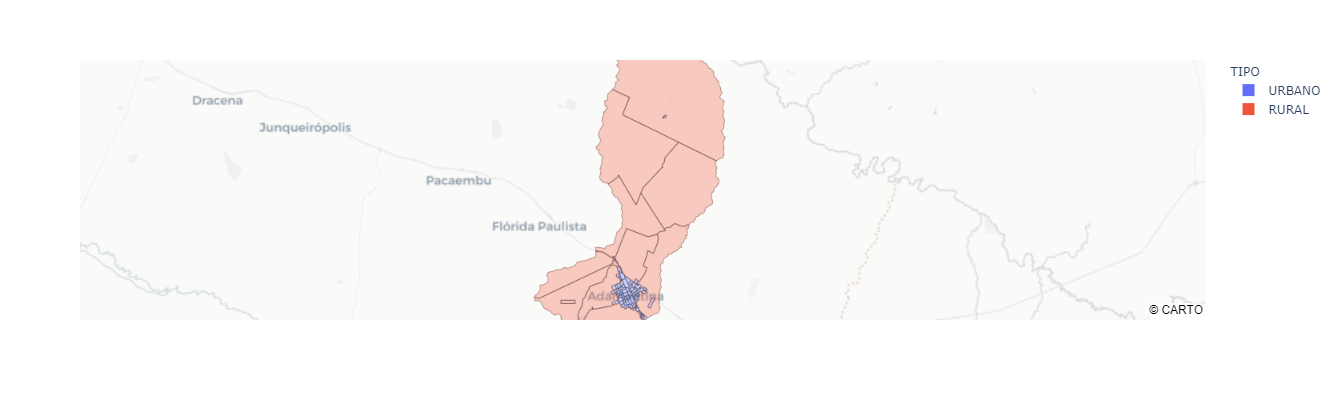

In [114]:
minx, miny, maxx, maxy = gdf1.total_bounds
max_bound = max(abs(maxx-minx), abs(maxy-miny)) * 111
zoom = 13 - np.log(max_bound)

fig_map = px.choropleth_mapbox(
    data_frame=gdf1
    , geojson=gdf1.geometry
#    , featureidkey=gdf.index
    , locations=gdf1.index
    , color='TIPO'
#    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=zoom
    ,center={"lat": lat, "lon": lon}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=400
    , opacity=0.3
    )
fig_map.show()

In [88]:
gdf = gpd.read_file('data/territorio/setores2010/SP/35SEE250GC_SIR.shp')

In [89]:
gdf = gdf.to_crs("EPSG:5880")

In [90]:
gdf.rename(columns={'CD_GEOCODI':'Cod'}, inplace=True)

In [91]:
gdf.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

In [92]:
uf = 'SP'

In [93]:
if uf.upper() == 'PE':
    df_pb_pop = pd.read_csv(f'data/pop/setores/PE/PE_20171016/PE/Base informaçoes setores2010 universo {uf.upper()}/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
elif uf.upper() == 'ES':
    df_pb_pop = pd.read_csv(f'data/pop/setores/ES/Base informaçoes setores2010 universo {uf.upper()}/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
elif uf.upper() == 'TO':
    df_pb_pop = pd.read_csv(f'data/pop/setores/TO/Base informacoes setores2010 universo TO/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
elif uf.upper() == 'RS':
    df_pb_pop = pd.read_csv(f'data/pop/setores/RS/RS_20150527/RS/Base informaçoes setores2010 universo {uf.upper()}/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
elif uf.upper() == 'SP':        
    df_pb_pop = pd.read_csv(f'data/pop/setores/SP/Base informaçoes setores2010 universo SP_Capital/CSV/Basico_SP1.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
    df_pb_pop2 = pd.read_csv(f'data/pop/setores/SP/SP Exceto a Capital/Base informaçoes setores2010 universo SP_Exceto_Capital/CSV/Basico_SP2.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='utf-8')
    df_pb_pop = pd.concat(objs=[df_pb_pop, df_pb_pop2])
    df_pb_pop.reset_index(drop=True, inplace=True)
else:
    df_pb_pop = pd.read_csv(f'data/pop/setores/{uf.upper()}/{uf.upper()}/Base informaçoes setores2010 universo {uf.upper()}/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')

In [94]:
df_pb_pop

,Cod_setor,V002
0,355030801000001,800.00
1,355030801000002,913.00
2,355030801000003,625.00
3,355030801000004,572.00
4,355030801000005,754.00
...,...,...
66091,355730305000008,815.00
66092,355730305000009,55.00
66093,355730305000010,103.00
66094,355730305000011,988.00


In [95]:
df_pb_pop.columns = ['Cod', 'Pop']

In [96]:
df_pb_pop['Cod'] = df_pb_pop.Cod.astype(np.int64)

In [97]:
df_pb_pop['Pop'].fillna(value=0, inplace=True)

In [98]:
df_pb_pop['Pop'] = df_pb_pop['Pop'].astype(np.int64)

In [99]:
gdf['Cod'] = gdf.Cod.astype(np.int64)

In [100]:
gdf = gdf.merge(df_pb_pop, on='Cod', how='left')

In [101]:
gdf['Pop'].fillna(value=0, inplace=True)

In [102]:
gdf

,Cod,TIPO,CD_GEOCODM,NM_MUNICIP,CD_GEOCODB,NM_BAIRRO,ID1,geometry,Pop
0,354100005000009,URBANO,3541000,PRAIA GRANDE,354100005001,Boqueirão,1,"POLYGON ((5771831.949 7322683.147, 5771684.680...",239.00
1,354100005000004,URBANO,3541000,PRAIA GRANDE,354100005001,Boqueirão,2,"POLYGON ((5771292.484 7323671.148, 5771302.507...",470.00
2,354100005000002,URBANO,3541000,PRAIA GRANDE,354100005001,Boqueirão,3,"POLYGON ((5771658.255 7323039.679, 5771626.879...",79.00
3,354100005000001,URBANO,3541000,PRAIA GRANDE,354100005001,Boqueirão,4,"POLYGON ((5771752.910 7323302.851, 5771689.763...",294.00
4,354100005000003,URBANO,3541000,PRAIA GRANDE,354100005001,Boqueirão,5,"POLYGON ((5771559.937 7323356.164, 5771401.294...",368.00
...,...,...,...,...,...,...,...,...,...
68291,355730305000008,URBANO,3557303,ESTIVA GERBI,None,None,68292,"POLYGON ((5725941.145 7517279.328, 5725852.555...",815.00
68292,355730305000009,URBANO,3557303,ESTIVA GERBI,None,None,68293,"POLYGON ((5723629.231 7524052.794, 5723933.414...",55.00
68293,355730305000010,URBANO,3557303,ESTIVA GERBI,None,None,68294,"POLYGON ((5723785.733 7520019.446, 5723886.672...",103.00
68294,355730305000011,RURAL,3557303,ESTIVA GERBI,None,None,68295,"POLYGON ((5726411.643 7519694.344, 5726481.619...",988.00


In [103]:
gdf['Pop'] = gdf['Pop'].astype(np.int64)

In [104]:
gdf['Area'] = gdf.area / 10000

In [105]:
gdf['Pop/ha'] = gdf['Pop'] / gdf['Area']

In [106]:
gdf1 = gpd.read_file(f'data/territorio/setores2010/SP/35SEE250GC_SIR.shp')

In [107]:
gdf1.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

In [108]:
gdf1.rename(columns={'CD_GEOCODI':'Cod'}, inplace=True)

In [109]:
gdf1['Cod'] = gdf1['Cod'].astype(np.int64)

In [110]:
gdf1

,Cod,TIPO,CD_GEOCODM,NM_MUNICIP,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,354100005000009,URBANO,3541000,PRAIA GRANDE,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,354100005000004,URBANO,3541000,PRAIA GRANDE,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,354100005000002,URBANO,3541000,PRAIA GRANDE,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,354100005000001,URBANO,3541000,PRAIA GRANDE,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,354100005000003,URBANO,3541000,PRAIA GRANDE,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."
...,...,...,...,...,...,...,...,...
68291,355730305000008,URBANO,3557303,ESTIVA GERBI,None,None,68292,"POLYGON ((-46.95301 -22.28885, -46.95401 -22.2..."
68292,355730305000009,URBANO,3557303,ESTIVA GERBI,None,None,68293,"POLYGON ((-46.97846 -22.22911, -46.97545 -22.2..."
68293,355730305000010,URBANO,3557303,ESTIVA GERBI,None,None,68294,"POLYGON ((-46.97514 -22.26519, -46.97416 -22.2..."
68294,355730305000011,RURAL,3557303,ESTIVA GERBI,None,None,68295,"POLYGON ((-46.94954 -22.26701, -46.94888 -22.2..."


In [111]:
gdf1 = gdf1.merge(right=gdf[['Cod', 'Pop', 'Area', 'Pop/ha']], on='Cod', how='left')            

In [112]:
gdf1

,Cod,TIPO,CD_GEOCODM,NM_MUNICIP,CD_GEOCODB,NM_BAIRRO,ID1,geometry,Pop,Area,Pop/ha
0,354100005000009,URBANO,3541000,PRAIA GRANDE,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0...",239,2.40,99.54
1,354100005000004,URBANO,3541000,PRAIA GRANDE,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0...",470,10.21,46.02
2,354100005000002,URBANO,3541000,PRAIA GRANDE,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0...",79,3.09,25.56
3,354100005000001,URBANO,3541000,PRAIA GRANDE,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0...",294,8.50,34.57
4,354100005000003,URBANO,3541000,PRAIA GRANDE,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0...",368,4.93,74.57
...,...,...,...,...,...,...,...,...,...,...,...
68291,355730305000008,URBANO,3557303,ESTIVA GERBI,None,None,68292,"POLYGON ((-46.95301 -22.28885, -46.95401 -22.2...",815,60.89,13.38
68292,355730305000009,URBANO,3557303,ESTIVA GERBI,None,None,68293,"POLYGON ((-46.97846 -22.22911, -46.97545 -22.2...",55,247.28,0.22
68293,355730305000010,URBANO,3557303,ESTIVA GERBI,None,None,68294,"POLYGON ((-46.97514 -22.26519, -46.97416 -22.2...",103,97.17,1.06
68294,355730305000011,RURAL,3557303,ESTIVA GERBI,None,None,68295,"POLYGON ((-46.94954 -22.26701, -46.94888 -22.2...",988,17.97,54.97


In [ ]:
return gdf1

In [2]:
gdf = gpd.read_file('data/territorio/setores2010/SP/35SEE250GC_SIR.shp')

In [ ]:
gdf = gdf.to_crs("EPSG:5880")

In [ ]:
gdf.area.sum() / 1000000

In [ ]:
fig_map.show()

In [ ]:
gdf_adamantina

In [ ]:
gdf_sj = gpd.read_file('data/territorio/setores2010/MG/3101300/')

In [ ]:
gdf_sj.crs

In [ ]:
gdf_sjp = load_sector_geodataframe(uf='PR',cod_municipio=4125506)

In [ ]:
gdf_sjp.crs

In [ ]:
gdf = load_sector_geodataframe(uf='SP',cod_municipio=3500105)

In [ ]:
gdf.crs

In [ ]:
lon = gdf.dissolve(by='NM_MUNICIP').centroid.x[0]
lat = gdf.dissolve(by='NM_MUNICIP').centroid.y[0]

In [ ]:
minx, miny, maxx, maxy = gdf.total_bounds
max_bound = max(abs(maxx-minx), abs(maxy-miny)) * 111
zoom = 13 - np.log(max_bound)

fig_map = px.choropleth_mapbox(
    data_frame=gdf
    , geojson=gdf.geometry
#    , featureidkey=gdf.index
    , locations=gdf.index
    , color='Pop/ha'
#    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=zoom
    ,center={"lat": lat, "lon": lon}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=400
    , opacity=0.3
    )

fig_map.update_layout(margin=dict(l=0, r=0, b=40, t=40))

In [ ]:
def plot_density(gdf):
    lon = gdf.dissolve(by='NM_MUNICIP').centroid.x[0]
    lat = gdf.dissolve(by='NM_MUNICIP').centroid.y[0]

    minx, miny, maxx, maxy = gdf.total_bounds
    max_bound = max(abs(maxx-minx), abs(maxy-miny)) * 111
    zoom = 13 - np.log(max_bound)

    fig_map = px.choropleth_mapbox(
        data_frame=gdf
        , geojson=gdf.geometry
    #    , featureidkey=gdf.index
        , locations=gdf.index
        , color='Pop/ha'
    #    , hover_name='CD_GEOCODI'
        , hover_data=None
        , zoom=zoom
        ,center={"lat": lat, "lon": lon}
        , mapbox_style="carto-positron"
        , title=None
        , template=None
        , width=None
        , height=400
        , opacity=0.3
        )
    
    fig_map.update_layout(margin=dict(l=0, r=0, b=40, t=40))

In [ ]:
df_pb_pop = pd.read_csv(f'data/pop/setores/SP/Base informaçoes setores2010 universo SP_Capital/CSV/Basico_SP1.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')

In [ ]:
df_pb_po2

In [ ]:
teste = treat_sectors_shp(uf='SP')

In [ ]:
teste

In [ ]:
pd.concat(objs=[df_pb_pop, df_pb_po2])

In [ ]:
treat_sectors_shp(uf='SP')

In [ ]:
def save_sectors_geodataframe(gdf, uf):
    for cod_mun in gdf['CD_GEOCODM'].unique():
        try:
            os.makedirs(f'data/territorio/setores2010/{uf}/{cod_mun}/', exist_ok=True)
            gdf.loc[gdf['CD_GEOCODM'] == cod_mun].to_file(f'data/territorio/setores2010/{uf}/{cod_mun}/{cod_mun}.shp')
        except:
            print(f'Exception while saving {cod_mun}.shp')
    print(f'files saved.')

In [ ]:
df_ac = geo.treat_sectors_shp(uf='AC')

In [ ]:
save_sectors_geodataframe

In [ ]:
df_ac

In [ ]:
def save_sectors_geodataframe(gdf, uf):
    for cod_mun in gdf.CD_GEOCODM.unique():
        try:
            os.makedirs(f'data/territorio/setores2010/{uf}/{cod_mun}/', exist_ok=True)
            gdf.loc[gdf['CD_GEOCODM'] == cod_mun].to_pickle(f'data/territorio/setores2010/{uf}/{cod_mun}/{cod_mun}.pkl')
        except:
            print(f'Exception while saving {cod_mun}.pkl')
    print(f'files saved.')

In [ ]:
save_sectors_geodataframe(gdf=df_ac, uf='AC')

In [ ]:
gdf = gpd.read_file('data/territorio/25SEE250GC_SIR.shp')

In [ ]:
gdf = gdf[gdf['CD_GEOCODM'] == '2507507']

In [ ]:
120 * 5000

In [ ]:
gdf.info()

In [ ]:
gdf.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

In [ ]:
gdf.to_file("data/territorio/2507507.geojson", driver="GeoJSON")

In [ ]:
gdf.columns

In [ ]:
gdf_joao_pessoa = gdf.dissolve(by='NM_MUNICIP')

In [ ]:
long = gdf_joao_pessoa.centroid.x[0]

In [ ]:
lat = gdf_joao_pessoa.centroid.y[0]

In [ ]:
with open("data/territorio/2507507.geojson") as file:
    geojson_mun = json.load(file)

In [ ]:
gdf

In [ ]:
px.choropleth_mapbox(
    data_frame=gdf
    , geojson=geojson_mun
    , featureidkey='properties.CD_GEOCODI'
    , locations='CD_GEOCODI'
    , color='TIPO'
    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=11
    ,center={"lat": lat, "lon": long}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=None
    , opacity=0.1
)

In [ ]:
world = world.to_crs("EPSG:3395")

In [ ]:
gdf1 = gpd.read_file('data/territorio/25SEE250GC_SIR.shp')

In [ ]:
gdf1.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

In [ ]:
gdf1 = gdf1[gdf1['NM_MUNICIP'] == 'CAMPINA GRANDE']

In [ ]:
px.choropleth_mapbox(
    data_frame=gdf1
    , geojson=gdf1.geometry
#    , featureidkey=gdf.index
    , locations=gdf1.index
    , color='TIPO'
    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=11
    ,center={"lat": lat, "lon": long}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=None
    , opacity=0.1
)

# PREPARANDO OS DADOS EM GEODATAFRAMES

## Procedimentos para criar o geodata frame e inserir os dados de população para a Paraíba

In [ ]:
gdf_pb = gpd.read_file('data/territorio/25SEE250GC_SIR.shp', encoding='ISO-8859-1')
gdf_pb.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

In [ ]:
df_pb = pd.read_csv('data/pop/setores/PB/Basico_PB.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')

In [ ]:
df_pb

In [ ]:
df_pb.rename(columns={'Cod_setor':'CD_GEOCODI', 'V002':'População'}, inplace=True)

In [ ]:
df_pb['CD_GEOCODI'] = df_pb.CD_GEOCODI.astype(np.int64)

In [ ]:
gdf_pb['CD_GEOCODI'] = gdf_pb.CD_GEOCODI.astype(np.int64)

In [ ]:
gdf_pb = gdf_pb.merge(df_pb, on='CD_GEOCODI')

In [ ]:
gdf_pb['População'].isna().sum()

In [ ]:
gdf_pb['População'].fillna(value=0, inplace=True)

In [ ]:
gdf_pb['População'] = gdf_pb['População'].astype(np.int64)

In [ ]:
gdf_pb = gdf_pb.to_crs("EPSG:31985")

In [ ]:
gdf_pb = gdf_pb.loc[gdf_pb['NM_MUNICIP'] == 'JOÃO PESSOA']

In [ ]:
gdf_pb['AREA_HA'] = gdf_pb['geometry'].area / 10000

In [ ]:
gdf_pb['Pop/ha'] = gdf_pb['População'] / gdf_pb['AREA_HA']

In [ ]:
gdf_pb.NM_MUNICIP.unique()

In [ ]:
px.choropleth_mapbox(
    data_frame=gdf1
    , geojson=gdf1.geometry
#    , featureidkey=gdf.index
    , locations=gdf1.index
    , color='TIPO'
    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=11
    ,center={"lat": lat, "lon": long}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=None
    , opacity=0.1
)

In [ ]:
px.choropleth_mapbox(
    data_frame=gdf_pb
    , geojson=geojson_mun
    , featureidkey='properties.CD_GEOCODI'
    , locations=gdf_pb.index
    , color='Pop/ha'
    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=11
    ,center={"lat": lat, "lon": long}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=None
    , opacity=0.1
)

In [ ]:
gdf_pb.reset_index(drop=True).to_feather('data/territorio/setores_2010_pb.ftd')

## Procedimentos para criar o geodata frame e inserir os dados de população para o Paraná

In [ ]:
gdf_pr = gpd.read_file('data/territorio/41SEE250GC_SIR.shp')
gdf_pr.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

In [ ]:
df_pr = pd.read_csv('data/pop/setores/PR/Basico_PR.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')

In [ ]:
df_pr.rename(columns={'Cod_setor':'CD_GEOCODI', 'V002':'População'}, inplace=True)

In [ ]:
df_pr['CD_GEOCODI'] = df_pr.CD_GEOCODI.astype(np.int64)

In [ ]:
gdf_pr['CD_GEOCODI'] = gdf_pr.CD_GEOCODI.astype(np.int64)

In [ ]:
gdf_pr = gdf_pr.merge(df_pr, on='CD_GEOCODI')

In [ ]:
gdf_pr['População'].fillna(value=0, inplace=True)

In [ ]:
gdf_pr['População'] = gdf_pr['População'].astype(np.int64)

In [ ]:
gdf_pr

In [ ]:
gdf_pr.reset_index(drop=True).to_feather('data/territorio/setores_2010_pr.ftd')

# Simulando o comportamento da plotagem dos dados no APP

In [ ]:
gdf_pb = gpd.read_feather('data/territorio/setores_2010_pb.ftd')

In [ ]:
gdf_pb.to_

In [ ]:
gdf_pr = gpd.read_feather('data/territorio/setores_2010_pr.ftd')

In [ ]:
gdf_pr = gdf_pr[gdf_pr['CD_GEOCODM'] == '4106902']

In [ ]:
long = gdf_pr.dissolve('CD_GEOCODM').centroid.x[0]
lat = gdf_pr.dissolve('CD_GEOCODM').centroid.y[0]

In [ ]:
fig = px.choropleth_mapbox(
    data_frame=gdf_pr
    , geojson=gdf_pr.geometry
#    , featureidkey=gdf.index
    , locations=gdf_pr.index
    , color='População'
    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=9.5
    ,center={"lat": lat, "lon": long}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=None
    , opacity=0.3
    , color_continuous_scale='Bupu'
)

In [ ]:
fig.show()

In [ ]:
fig.to

In [ ]:
px.colors.sequential.swatches()

## GEEMAP

In [ ]:
import osr

In [ ]:
gdf = gpd.read_file('data/territorio/25SEE250GC_SIR.shp')

In [ ]:
gdf = gdf.to_crs("EPSG:5880")

In [ ]:
#gdf = gdf.to_crs("EPSG:9001")

In [ ]:
gdf.rename(columns={'CD_GEOCODI':'Cod'}, inplace=True)

In [ ]:
gdf.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

In [ ]:
df_pb_pop = pd.read_csv('data/pop/setores/PB/Basico_PB.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')

In [ ]:
df_pb_pop.columns = ['Cod', 'Pop']

In [ ]:
df_pb_pop['Cod'] = df_pb_pop.Cod.astype(np.int64)

In [ ]:
df_pb_pop['Pop'].fillna(value=0, inplace=True)

In [ ]:
df_pb_pop['Pop'] = df_pb_pop['Pop'].astype(np.int64)

In [ ]:
df_pb_pop['Pop'].isna().sum()

In [ ]:
gdf['Cod'] = gdf.Cod.astype(np.int64)

In [ ]:
gdf = gdf.merge(df_pb_pop, on='Cod', how='left')

In [ ]:
gdf['Pop'].fillna(value=0, inplace=True)

In [ ]:
gdf['Pop'] = gdf['Pop'].astype(np.int64)

In [ ]:
gdf.area.sum()

In [ ]:
gdf['Area'] = gdf.area / 10000

In [ ]:
gdf['Pop/ha'] = gdf['Pop'] / gdf['Area']

In [ ]:
gdf.drop(labels=['AREA_HA'], axis=1, inplace=True)

In [ ]:
lon = gdf.dissolve(by='NM_MUNICIP').centroid.x[0]
lat = gdf.dissolve(by='NM_MUNICIP').centroid.y[0]

In [ ]:
gdf1 = gpd.read_file('data/territorio/25SEE250GC_SIR.shp')

In [ ]:
gdf1.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

In [ ]:
gdf1.rename(columns={'CD_GEOCODI':'Cod'}, inplace=True)

In [ ]:
gdf1['Cod'] = gdf1['Cod'].astype(np.int64)

In [ ]:
gdf1 = gdf1.merge(right=gdf[['Cod', 'Pop', 'Area', 'Pop/ha']], on='Cod', how='left')

In [ ]:
gdf1 = gdf1[gdf1['CD_GEOCODM'] == '2507507']

In [ ]:
lon = gdf1.dissolve(by='NM_MUNICIP').centroid.x[0]
lat = gdf1.dissolve(by='NM_MUNICIP').centroid.y[0]

In [ ]:
gdf1.to_file("teste_gpkg_joao_pessoa.gpkg", driver="GPKG")

In [ ]:
gdf1 = gpd.gpd.read_file("teste_gpkg_joao_pessoa.gpkg")

In [ ]:
lon = gdf.dissolve(by='NM_MUNICIP').to_crs("EPSG:5880").centroid.x[0]
lat = gdf.dissolve(by='NM_MUNICIP').to_crs("EPSG:5880").centroid.y[0]

In [ ]:
fig = px.choropleth_mapbox(
    data_frame=gdf1
    , geojson=gdf1.geometry
#    , featureidkey=gdf.index
    , locations=gdf1.index
    , color='Pop/ha'
#    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=11
    ,center={"lat": lat, "lon": lon}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=None
    , opacity=0.3
)

fig.update_geos(fitbounds="geojson", visible=True)

In [ ]:
import plotly.io as pio

In [ ]:
pio.write_json(fig, 'teste_fig_map_joao_pessoa.json')

In [ ]:
pio.read_json('teste_fig_map_joao_pessoa.json')

In [ ]:
gdf.to_file("data/territorio/2507507.geojson", driver="GeoJSON")

In [ ]:
gdf = gdf[gdf['CD_GEOCODM'] == '2507507']

In [ ]:
gdf.columns

In [ ]:
long = gdf.dissolve(by='NM_MUNICIP').centroid.x[0]
lat = gdf.dissolve(by='NM_MUNICIP').centroid.y[0]

In [ ]:
long = gdf_joao_pessoa.centroid.x[0]

In [ ]:
lat = gdf_joao_pessoa.centroid.y[0]

In [ ]:
with open("data/territorio/2507507.geojson") as file:
    geojson_mun = json.load(file)

In [ ]:
gdf

In [ ]:
px.choropleth_mapbox(
    data_frame=gdf
    , geojson=geojson_mun
    , featureidkey='properties.CD_GEOCODI'
    , locations='CD_GEOCODI'
    , color='TIPO'
    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=11
    ,center={"lat": lat, "lon": long}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=None
    , opacity=0.1
)

In [ ]:
# SIRGAS 2000 / Brazil Polyconic
world = world.to_crs("EPSG:5880")

In [ ]:
gdf1 = gpd.read_file('data/territorio/25SEE250GC_SIR.shp')

In [ ]:
gdf1.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

In [ ]:
gdf1 = gdf1[gdf1['NM_MUNICIP'] == 'CAMPINA GRANDE']

In [ ]:
px.choropleth_mapbox(
    data_frame=gdf
    , geojson=gdf.geometry
#    , featureidkey=gdf.index
    , locations=gdf.index
    , color='TIPO'
    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=11
    ,center={"lat": lat, "lon": lon}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=None
    , opacity=0.1
)

Creating Function

In [ ]:
def treat_sectors_shp(ufs):
    
    dict_ufs = {
        'RO':'11',
        'AC':'12',
        'AM':'13',
        'RO':'14',
        'PA':'15',
        'AM':'16',
        'TO':'17',
        'MA':'21',
        'PI':'22',
        'CE':'23',
        'RN':'24',
        'PB':'25',
        'PE':'26',
        'AL':'27',
        'SE':'28',
        'BA':'29',
        'MG':'31',
        'ES':'32',
        'RJ':'33',
        'SP':'35',
        'PR':'41',
        'SC':'42',
        'RS':'43',
        'MS':'50',
        'MT':'51',
        'GO':'52',
        'DF':'53'
    }
    
    for uf in ufs:
        gdf = gpd.read_file(f'data/territorio/setores2010/{uf}/{dict_ufs[uf]}SEE250GC_SIR.shp')

        gdf = gdf.to_crs("EPSG:5880")

        gdf.rename(columns={'CD_GEOCODI':'Cod'}, inplace=True)

        gdf.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

        df_pb_pop = pd.read_csv(f'data/pop/setores/{uf}/Basico_{uf}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')

        df_pb_pop.columns = ['Cod', 'Pop']

        df_pb_pop['Cod'] = df_pb_pop.Cod.astype(np.int64)

        df_pb_pop['Pop'].fillna(value=0, inplace=True)

        df_pb_pop['Pop'] = df_pb_pop['Pop'].astype(np.int64)

        gdf['Cod'] = gdf.Cod.astype(np.int64)

        gdf = gdf.merge(df_pb_pop, on='Cod', how='left')

        gdf['Pop'].fillna(value=0, inplace=True)

        gdf['Pop'] = gdf['Pop'].astype(np.int64)

        gdf['Area'] = gdf.area / 10000

        gdf['Pop/ha'] = gdf['Pop'] / gdf['Area']

        gdf.drop(labels=['AREA_HA'], axis=1, inplace=True)

        gdf1 = gpd.read_file(f'data/territorio/setores2010/{uf}/{dict_ufs[uf]}SEE250GC_SIR.shp')

        gdf1.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

        gdf1.rename(columns={'CD_GEOCODI':'Cod'}, inplace=True)

        gdf1['Cod'] = gdf1['Cod'].astype(np.int64)

        gdf1 = gdf1.merge(right=gdf[['Cod', 'Pop', 'Area', 'Pop/ha']], on='Cod', how='left')            
        
        return gdf1

In [ ]:
def save_sectors_geodataframe(gdf, uf):
    for cod_mun in gdf.CD_GEOCODM.unique():
        os.makedirs(f'data/territorio/setores2010/{uf}/{cod_mun}/', exist_ok=True)
        gdf.loc[gdf['CD_GEOCODM'] == cod_mun].to_pickle(f'data/territorio/setores2010/{uf}/{cod_mun}/{cod_mun}.pkl')
        print(f'{cod_mun}saved.')

In [ ]:
gdf = treat_sectors_shp(ufs=['PB'])

In [ ]:
save_sectors_geodataframe(gdf=gdf, uf='PB')

In [ ]:
gdf1 = pd.read_pickle('data/territorio/setores2010/PB/2507507/2507507.pkl')

In [ ]:
gdf1.to_file("countries.shp")

In [ ]:
lon = gdf1.dissolve(by='NM_MUNICIP').centroid.x[0]
lat = gdf1.dissolve(by='NM_MUNICIP').centroid.y[0]

In [ ]:
fig = px.choropleth_mapbox(
    data_frame=gdf1
    , geojson=gdf1.geometry
#    , featureidkey=gdf.index
    , locations=gdf1.index
    , color='Pop/ha'
#    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=11
    ,center={"lat": lat, "lon": lon}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=None
    , opacity=0.3
)

fig.update_geos(fitbounds="geojson", visible=True)

In [ ]:
import cloudpickle as cp

In [ ]:
from urllib.request import urlopen
zipfile = urlopen("https://github.com/augustogeog/python_demo/blob/30b1ec2dfccfc435b14f3708cd3d021b7c1637f3/data/territorio/setores2010/PB/2500106/2500106.pkl?raw=true", 'rb')

In [ ]:
from urllib.request import urlopen
import pickle
loaded_pickle_object = pickle.loads(urlopen("https://github.com/augustogeog/python_demo/blob/main/data/territorio/setores2010/PB/2500106/2500106.pkl?raw=true", 'rb'))

In [ ]:
gdf1.loc[gdf1['CD_GEOCODM'] == '2507507']['NM_MUNICIP'].unique()[0]

In [ ]:
gdf1 = gdf1.loc[gdf1['NM_MUNICIP'] == 'JOÃO PESSOA']

In [ ]:
gdf1 = treat_sectors_shp(ufs=['PB'])

In [ ]:
gdf1 = gdf1.loc[gdf1['NM_MUNICIP'] == 'JOÃO PESSOA']

In [ ]:
gdf1.to_pickle('teste.zip', compression='zip')

In [ ]:
gdf1.NM_MUNICIP.unique()[0]

In [ ]:
gdf1.info()

In [ ]:
gdf1

In [ ]:
/    gdf1 = gdf1[gdf1['CD_GEOCODM'] == '2507507']

In [ ]:
lon = gdf1.dissolve(by='NM_MUNICIP').centroid.x[0]
lat = gdf1.dissolve(by='NM_MUNICIP').centroid.y[0]

In [ ]:
gdf1.to_file("teste_gpkg_joao_pessoa.gpkg", driver="GPKG")

In [ ]:
gdf1 = gpd.gpd.read_file("teste_gpkg_joao_pessoa.gpkg")